# 5.1 데이터셋 설명

In [2]:
from collections import Counter
import matplotlib.pyplot as plt
num_friends = [100,49,41,40,25,21,21,19,19,18,18,16,15,15,15,15,14,14,13,13,13,13,12,12,11,
               10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,
               8,8,8,8,8,8,8,8,8,8,8,8,8,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,
               6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,
               4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,
               2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1]

c:\users\drepi\anaconda3\envs\rhs\lib\site-packages\numpy\_distributor_init.py:32: UserWarning: loaded more than 1 DLL from .libs:
c:\users\drepi\anaconda3\envs\rhs\lib\site-packages\numpy\.libs\libopenblas.GK7GX5KEQ4F6UYO3P26ULGBQYHGQO7J4.gfortran-win_amd64.dll
c:\users\drepi\anaconda3\envs\rhs\lib\site-packages\numpy\.libs\libopenblas.WCDJNK7YVMPZQ2ME2ZZHJJRJ3JIKNDB7.gfortran-win_amd64.dll
  stacklevel=1)


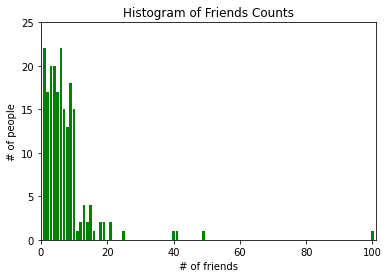

In [5]:
friend_counts=Counter(num_friends)
xs=range(101)
ys=[friend_counts[x] for x in xs]

plt.bar(xs,ys,color='green')
plt.axis([0,101,0,25])
plt.title("Histogram of Friends Counts")
plt.xlabel("# of friends")
plt.ylabel("# of people")
plt.show()

In [8]:
nu_points=len(num_friends)
largest_val=max(num_friends)
smallest_val=min(num_friends)
print('larg',largest_val)
print('small',smallest_val)

sorted_val=sorted(num_friends)
smallest_val=sorted_val[0]
seclarg_val=sorted_val[-2]
largest_val=sorted_val[-1]
print('larg',largest_val)
print('small',smallest_val)
print('seclarg',seclarg_val)

larg 100
small 1
larg 100
small 1
seclarg 49


# 5.1.1 중심 경향성

In [11]:
from typing import List

def mean(xs: List[float])->float: # 평균값
    return sum(xs)/len(xs)

mean(num_friends)

7.333333333333333

In [16]:
def _median_odd(xs:List[float])->float: # 중앙값
    return sorted(xs)[len(xs)//2]

def _median_even(xs:List[float])->float:
    sorted_xs=sorted(xs)
    mid_point=len(xs)//2
    return (sorted_xs[mid_point-1]+sorted_xs[mid_point])/2

def median(v: List[float])->float:
    return _median_even(v) if len(v)%2==0 else _median_odd(v)

In [17]:
print(median([1,9,2,10]))

print(median(num_friends))

5.5
6.0


In [20]:
def quantile(xs: List[float],p:float)->float: # 분기
    p_index=int(p*len(xs))
    return sorted(xs)[p_index]

print(quantile(num_friends,0.1))
print(quantile(num_friends,0.25))
print(quantile(num_friends,0.75))
print(quantile(num_friends,0.9))

1
3
9
13


In [22]:
def mode(xs:List[float])->List[float]:#최빈값
    counts=Counter(xs)
    max_count=max(counts.values())
    return [x_i for x_i,count in counts.items() if count==max_count]

print(set(mode(num_friends)))

{1, 6}
